# **linear regression**

---



#*Ordinary Least Square*

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
dx=pd.read_csv('/content/student_scores.csv')

X = dx['Hours'].values.reshape(-1, 1)
y = dx['Scores']

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 28.882730509245466


# 	Batch Gradient Descent


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
d=pd.read_csv('/content/student_scores.csv')

X = dx['Hours'].values
y = dx['Scores']

j
learning_rate = 0.01
num_iterations = 1000

theta0 = 0
theta1 = 0

for iteration in range(num_iterations):
    y_pred=theta0 + theta1 * X
    error = y_pred-y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1


y_pred = theta0 + theta1 * X
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
print("theta0(intercept)",theta0)
print("theta1(coefficient)",theta1)

Mean Squared Error: 28.88606746371792
theta0(intercept) 2.3531789358052353
theta1(coefficient) 9.79686727860809


# Stochastic Gradient Descent

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = dx['Hours'].values.reshape(-1, 1)
y = dx['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, learning_rate='invscaling', penalty=None, random_state=42)

sgd_reg.fit(X_train, y_train.ravel())
y_pred = sgd_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

intercept, coef = sgd_reg.intercept_[0], sgd_reg.coef_[0]
print("Intercept:", intercept)
print("Coefficient:", coef)


Mean Squared Error: 58.09059574943209
Intercept: 4.852624564737006
Coefficient: 10.623955763297237


#Minibatch Gradient Descent.

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X = dx['Hours'].values.reshape(-1, 1)
y = dx['Scores']

sgd = SGDRegressor(loss='squared_error', alpha=0.0001, learning_rate='constant', eta0=0.01, max_iter=100, shuffle=True, random_state=42)

batch_size = 5
n_samples = X.shape[0]
n_batches = n_samples // batch_size

for epoch in range(100):
    for batch in range(n_batches):
        start = batch * batch_size
        end = (batch + 1) * batch_size
        X_batch = X[start:end]
        y_batch = y[start:end]

        sgd.partial_fit(X_batch, y_batch)


X_test = dx['Hours'].values.reshape(-1, 1)
y_test = dx['Scores']

y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

print("Intercept:", sgd.intercept_)
print("Coefficient:", sgd.coef_)




Mean Squared Error (MSE): 46.46859917108746
Intercept: [3.21338812]
Coefficient: [10.40677787]


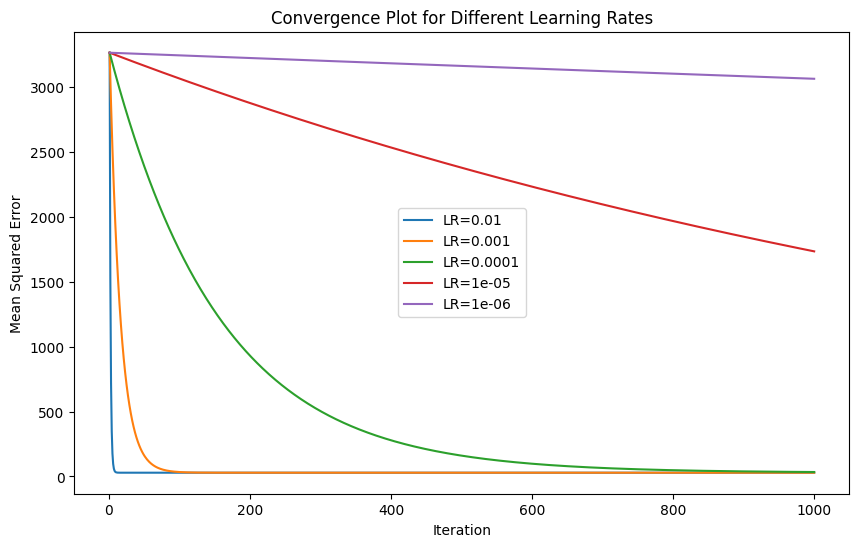

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

d = pd.read_csv('/content/student_scores.csv')
X = d['Hours'].values
y = d['Scores']

learning_rates = [0.01, 0.001, 0.0001, 0.00001,0.000001]
num_iterations = 1000
theta0 = 0
theta1 = 0

plt.figure(figsize=(10, 6))
plt.title('Convergence Plot for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')

for learning_rate in learning_rates:

    theta0 = 0
    theta1 = 0

    mse_values = []

    for iteration in range(num_iterations):
        y_pred = theta0 + theta1 * X
        error = y_pred - y
        gradient_theta0 = np.sum(error) / len(y)
        gradient_theta1 = np.sum(error * X) / len(y)
        theta0 -= learning_rate * gradient_theta0
        theta1 -= learning_rate * gradient_theta1

        mse = mean_squared_error(y, y_pred)
        mse_values.append(mse)


    plt.plot(range(1, num_iterations + 1), mse_values, label=f'LR={learning_rate}')

plt.legend()
plt.show()


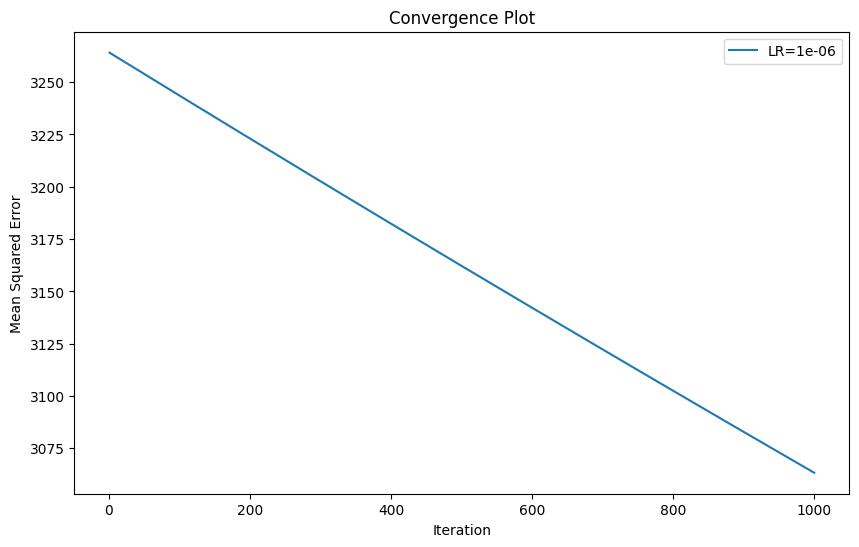

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

d = pd.read_csv('/content/student_scores.csv')
X = d['Hours'].values
y = d['Scores']

num_iterations = 1000
learning_rate = 0.000001
theta0 = 0
theta1 = 0
mse_values = []
for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    gradient_theta0 = np.sum(error) / len(y)
    gradient_theta1 = np.sum(error * X) / len(y)
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), mse_values, label=f'LR={learning_rate}')

plt.title('Convergence Plot')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
